In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sales_data=pd.read_csv("advertising.csv")
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
sales_data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
sales_data.drop_duplicates(inplace=True)
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
y=sales_data["Sales"]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [6]:
x_tv=sales_data.drop(["Radio","Newspaper","Sales"],axis=1)
x_tv

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [7]:
x_tv_train,x_tv_test,y_tv_train,y_tv_test= train_test_split(x_tv,y,test_size=0.1)

In [8]:
x_tv_test

,TV
94,107.4
20,218.4
41,177.0
137,273.7
181,218.5
191,75.5
25,262.9
124,229.5
148,38.0
69,216.8


In [9]:
x_tv_train

,TV
184,253.8
31,112.9
178,276.7
135,48.3
167,206.8
...,...
26,142.9
182,56.2
60,53.5
58,210.8


In [10]:
y_tv_test

94     11.5
20     18.0
41     17.1
137    20.8
181    17.2
191    11.9
25     17.0
124    19.7
148    10.9
69     22.3
32     13.2
57     13.2
61     24.2
13     13.7
108     5.3
78      5.3
103    19.7
106     7.2
49      9.7
113    20.9
Name: Sales, dtype: float64

In [11]:
y_tv_train

184    17.6
31     11.9
178    16.8
135    11.6
167    17.2
       ... 
26     15.0
182     8.7
60      8.1
58     23.8
51     10.7
Name: Sales, Length: 180, dtype: float64

In [12]:
lin_reg_tv = LinearRegression()
lin_reg_tv.fit(x_tv_train, y_tv_train)

LinearRegression()

In [13]:
y_tv_pred_lin = lin_reg_tv.predict(x_tv_test)
mse_lin_tv = mean_squared_error(y_tv_test, y_tv_pred_lin)
r2_lin_tv = r2_score(y_tv_test, y_tv_pred_lin)


In [14]:
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lin_tv:.4f}")
print(f"R^2 Score: {r2_lin_tv:.4f}")

Linear Regression Results:
Mean Squared Error: 3.9423
R^2 Score: 0.8679


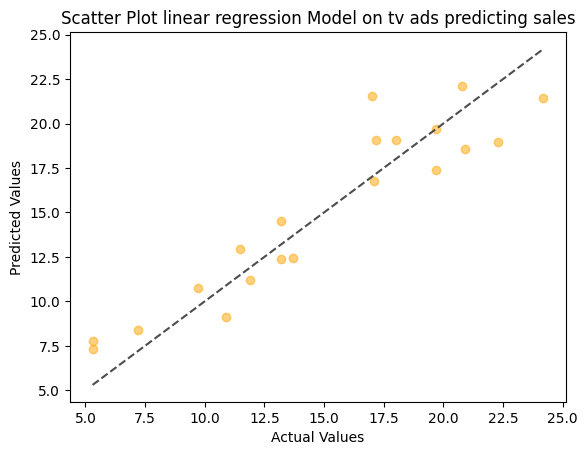

In [15]:
plt.scatter(y_tv_test, y_tv_pred_lin, alpha=0.5,color="orange")
plt.plot([y_tv_test.min(), y_tv_test.max()],[y_tv_test.min(), y_tv_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot linear regression Model on tv ads predicting sales')
plt.show()

In [16]:
ridge_reg_tv = Ridge(alpha=2.8) 
ridge_reg_tv.fit(x_tv_train, y_tv_train)

Ridge(alpha=2.8)

In [17]:
y_tv_pred_ridge = ridge_reg_tv.predict(x_tv_test)
mse_ridge_tv = mean_squared_error(y_tv_test, y_tv_pred_ridge)
r2_ridge_tv = r2_score(y_tv_test, y_tv_pred_ridge)

In [18]:
print("\nRidge Regression Results:")
print(f"Mean Squared Error: {mse_ridge_tv:.4f}")
print(f"R^2 Score: {r2_ridge_tv:.4f}")


Ridge Regression Results:
Mean Squared Error: 3.9423
R^2 Score: 0.8679


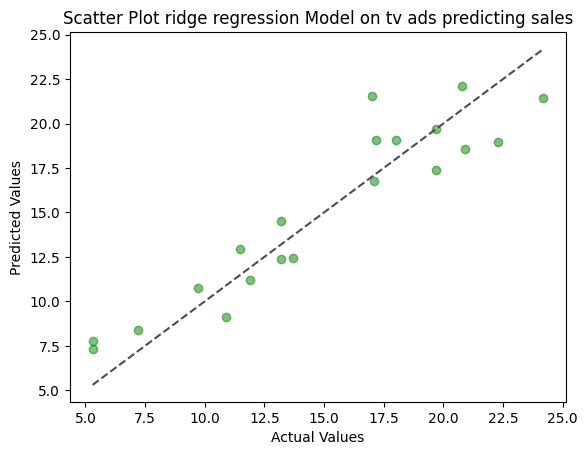

In [19]:
plt.scatter(y_tv_test, y_tv_pred_ridge, alpha=0.5,color="green")
plt.plot([y_tv_test.min(), y_tv_test.max()],[y_tv_test.min(), y_tv_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot ridge regression Model on tv ads predicting sales')
plt.show()

In [20]:
lasso_reg_tv = Lasso(alpha=.0001) 
lasso_reg_tv .fit(x_tv_train, y_tv_train)


Lasso(alpha=0.0001)

In [21]:
y_tv_pred_lasso = lasso_reg_tv.predict(x_tv_test)
mse_lasso_tv = mean_squared_error(y_tv_test, y_tv_pred_lasso)
r2_lasso_tv = r2_score(y_tv_test, y_tv_pred_lasso)

In [22]:
print("\nLasso Regression Results:")
print(f"Mean Squared Error: {mse_lasso_tv:.4f}")
print(f"R^2 Score: {r2_lasso_tv:.4f}")


Lasso Regression Results:
Mean Squared Error: 3.9423
R^2 Score: 0.8679


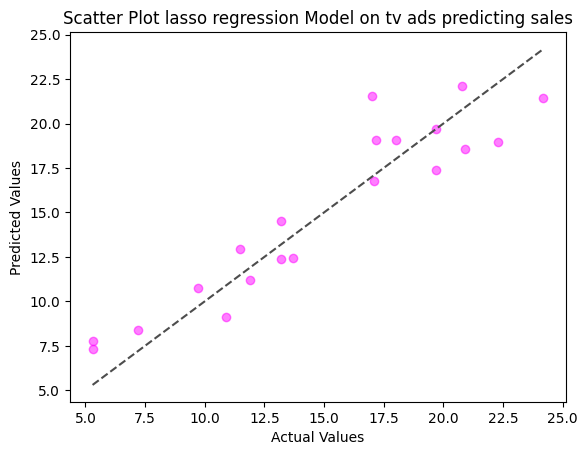

In [23]:
plt.scatter(y_tv_test, y_tv_pred_lasso, alpha=0.5,color="magenta")
plt.plot([y_tv_test.min(), y_tv_test.max()],[y_tv_test.min(), y_tv_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot lasso regression Model on tv ads predicting sales')
plt.show()

In [24]:
y=sales_data["Sales"]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [25]:
x_radio=sales_data.drop(["TV","Newspaper","Sales"],axis=1)
x_radio

,Radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8
...,...
195,3.7
196,4.9
197,9.3
198,42.0


In [26]:
x_radio_train,x_radio_test,y_radio_train,y_radio_test= train_test_split(x_radio,y,test_size=0.1)

In [27]:
x_radio_test

,Radio
47,41.5
135,47.0
167,5.2
73,5.7
57,19.2
74,24.6
124,32.3
75,43.7
164,14.7
177,7.8


In [28]:
x_radio_train

,Radio
49,11.7
88,25.5
58,49.6
107,0.3
165,3.4
...,...
97,21.0
90,4.9
146,7.3
128,49.0


In [29]:
y_radio_test

47     23.2
135    11.6
167    17.2
73     11.0
57     13.2
74     17.0
124    19.7
75      8.7
164    11.9
177    16.7
54     20.2
151    11.6
83     13.6
45     16.1
113    20.9
198    25.5
50     16.4
65     11.3
162    19.9
109    19.8
Name: Sales, dtype: float64

In [30]:
y_radio_train

49      9.7
88     12.9
58     23.8
107    12.0
165    16.9
       ... 
97     20.5
90     14.0
146    18.2
128    24.7
142    20.1
Name: Sales, Length: 180, dtype: float64

In [31]:
lin_reg_radio = LinearRegression()
lin_reg_radio.fit(x_radio_train, y_radio_train)

LinearRegression()

In [32]:
y_radio_pred_lin = lin_reg_radio.predict(x_radio_test)
mse_lin_radio = mean_squared_error(y_radio_test, y_radio_pred_lin)
r2_lin_radio = r2_score(y_radio_test, y_radio_pred_lin)


In [33]:
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lin_radio:.4f}")
print(f"R^2 Score: {r2_lin_radio:.4f}")

Linear Regression Results:
Mean Squared Error: 21.4759
R^2 Score: -0.0787


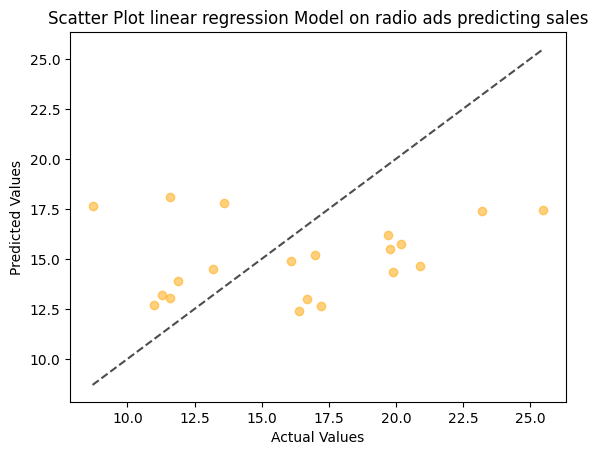

In [34]:
plt.scatter(y_radio_test, y_radio_pred_lin, alpha=0.5,color="orange")
plt.plot([y_radio_test.min(), y_radio_test.max()],[y_radio_test.min(), y_radio_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot linear regression Model on radio ads predicting sales')
plt.show()

In [35]:
ridge_reg_radio = Ridge(alpha=2.8) 
ridge_reg_radio.fit(x_radio_train, y_radio_train)

Ridge(alpha=2.8)

In [36]:
y_radio_pred_ridge = ridge_reg_radio.predict(x_radio_test)
mse_ridge_radio = mean_squared_error(y_radio_test, y_radio_pred_ridge)
r2_ridge_radio = r2_score(y_radio_test, y_radio_pred_ridge)

In [37]:
print("\nRidge Regression Results:")
print(f"Mean Squared Error: {mse_ridge_radio:.4f}")
print(f"R^2 Score: {r2_ridge_radio:.4f}")


Ridge Regression Results:
Mean Squared Error: 21.4757
R^2 Score: -0.0787


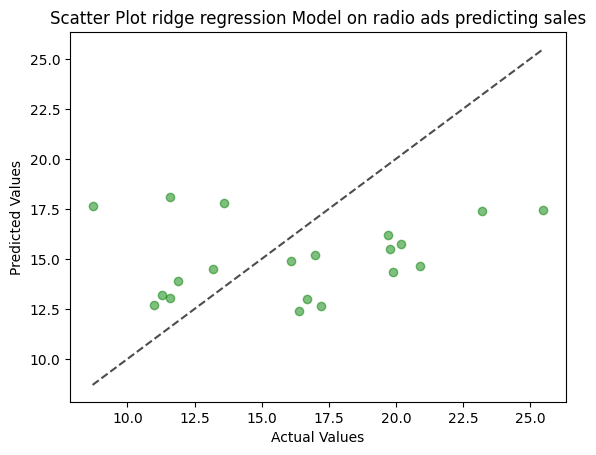

In [38]:
plt.scatter(y_radio_test, y_radio_pred_ridge, alpha=0.5,color="green")
plt.plot([y_radio_test.min(), y_radio_test.max()],[y_radio_test.min(), y_radio_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot ridge regression Model on radio ads predicting sales')
plt.show()

In [39]:
lasso_reg_radio = Lasso(alpha=.0001) 
lasso_reg_radio .fit(x_radio_train, y_radio_train)


Lasso(alpha=0.0001)

In [40]:
y_radio_pred_lasso = lasso_reg_radio.predict(x_radio_test)
mse_lasso_radio = mean_squared_error(y_radio_test, y_radio_pred_lasso)
r2_lasso_radio = r2_score(y_radio_test, y_radio_pred_lasso)

In [41]:
print("\nLasso Regression Results:")
print(f"Mean Squared Error: {mse_lasso_radio:.4f}")
print(f"R^2 Score: {r2_lasso_radio:.4f}")


Lasso Regression Results:
Mean Squared Error: 21.4759
R^2 Score: -0.0787


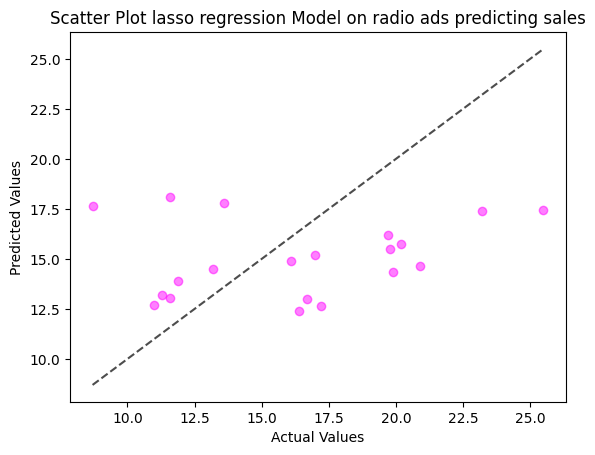

In [42]:
plt.scatter(y_radio_test, y_radio_pred_lasso, alpha=0.5,color="magenta")
plt.plot([y_radio_test.min(), y_radio_test.max()],[y_radio_test.min(), y_radio_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot lasso regression Model on radio ads predicting sales')
plt.show()

In [43]:
y=sales_data["Sales"]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [44]:
x_newspaper=sales_data.drop(["TV","Radio","Sales"],axis=1)
x_newspaper

,Newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4
...,...
195,13.8
196,8.1
197,6.4
198,66.2


In [45]:
x_newspaper_train,x_newspaper_test,y_newspaper_train,y_newspaper_test= train_test_split(x_newspaper,y,test_size=0.1)

In [46]:
x_newspaper_test

,Newspaper
133,45.1
175,41.8
31,38.6
158,45.2
109,5.5
123,12.4
27,22.9
33,0.3
96,5.9
83,35.6


In [47]:
x_newspaper_train

,Newspaper
188,3.7
13,7.2
180,8.3
98,51.2
197,6.4
...,...
128,3.2
23,26.2
8,1.0
7,11.6


In [48]:
y_newspaper_test

133    19.6
175    27.0
31     11.9
158     7.3
109    19.8
123    15.2
27     20.9
33     17.4
96     16.7
83     13.6
161    13.3
146    18.2
127    11.9
179    17.6
29     10.5
167    17.2
118    15.9
129     9.7
182     8.7
60      8.1
Name: Sales, dtype: float64

In [49]:
y_newspaper_train

188    20.9
13     13.7
180    15.5
98     25.4
197    14.8
       ... 
128    24.7
23     20.5
8       4.8
7      13.2
113    20.9
Name: Sales, Length: 180, dtype: float64

In [50]:
lin_reg_newspaper = LinearRegression()
lin_reg_newspaper.fit(x_newspaper_train, y_newspaper_train)

LinearRegression()

In [51]:
y_newspaper_pred_lin = lin_reg_newspaper.predict(x_newspaper_test)
mse_lin_newspaper = mean_squared_error(y_newspaper_test, y_newspaper_pred_lin)
r2_lin_newspaper = r2_score(y_newspaper_test, y_newspaper_pred_lin)


In [52]:
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lin_newspaper:.4f}")
print(f"R^2 Score: {r2_lin_newspaper:.4f}")

Linear Regression Results:
Mean Squared Error: 25.8703
R^2 Score: -0.0931


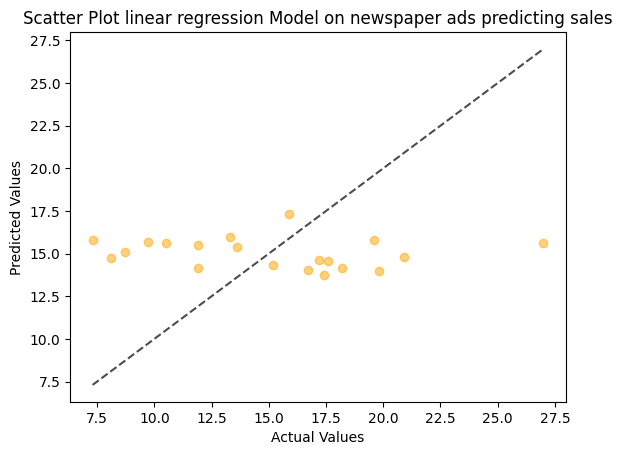

In [53]:
plt.scatter(y_newspaper_test, y_newspaper_pred_lin, alpha=0.5,color="orange")
plt.plot([y_newspaper_test.min(), y_newspaper_test.max()],[y_newspaper_test.min(), y_newspaper_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot linear regression Model on newspaper ads predicting sales')
plt.show()

In [54]:
ridge_reg_newspaper = Ridge(alpha=2.8) 
ridge_reg_newspaper.fit(x_newspaper_train, y_newspaper_train)

Ridge(alpha=2.8)

In [55]:
y_newspaper_pred_ridge = ridge_reg_newspaper.predict(x_newspaper_test)
mse_ridge_newspaper = mean_squared_error(y_newspaper_test, y_newspaper_pred_ridge)
r2_ridge_newspaper = r2_score(y_newspaper_test, y_newspaper_pred_ridge)

In [56]:
print("\nRidge Regression Results:")
print(f"Mean Squared Error: {mse_ridge_newspaper:.4f}")
print(f"R^2 Score: {r2_ridge_newspaper:.4f}")


Ridge Regression Results:
Mean Squared Error: 25.8702
R^2 Score: -0.0931


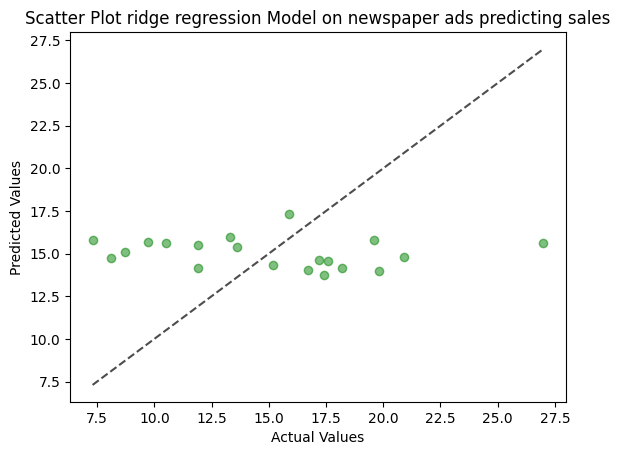

In [57]:
plt.scatter(y_newspaper_test, y_newspaper_pred_ridge, alpha=0.5,color="green")
plt.plot([y_newspaper_test.min(), y_newspaper_test.max()],[y_newspaper_test.min(), y_newspaper_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot ridge regression Model on newspaper ads predicting sales')
plt.show()

In [58]:
lasso_reg_newspaper = Lasso(alpha=.0001) 
lasso_reg_newspaper .fit(x_newspaper_train, y_newspaper_train)


Lasso(alpha=0.0001)

In [59]:
y_newspaper_pred_lasso = lasso_reg_newspaper.predict(x_newspaper_test)
mse_lasso_newspaper = mean_squared_error(y_newspaper_test, y_newspaper_pred_lasso)
r2_lasso_newspaper = r2_score(y_newspaper_test, y_newspaper_pred_lasso)

In [60]:
print("\nLasso Regression Results:")
print(f"Mean Squared Error: {mse_lasso_newspaper:.4f}")
print(f"R^2 Score: {r2_lasso_newspaper:.4f}")


Lasso Regression Results:
Mean Squared Error: 25.8703
R^2 Score: -0.0931


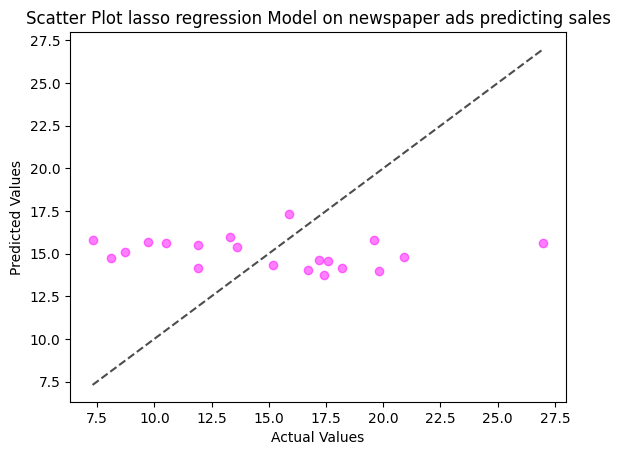

In [61]:
plt.scatter(y_newspaper_test, y_newspaper_pred_lasso, alpha=0.5,color="magenta")
plt.plot([y_newspaper_test.min(), y_newspaper_test.max()],[y_newspaper_test.min(), y_newspaper_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot lasso regression Model on newspaper ads predicting sales')
plt.show()

In [62]:
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [63]:
x=sales_data.drop("Sales",axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [64]:
y=sales_data["Sales"]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)


In [66]:
x_train

,TV,Radio,Newspaper
105,137.9,46.4,59.0
146,240.1,7.3,8.7
50,199.8,3.1,34.6
131,265.2,2.9,43.0
193,166.8,42.0,3.6
...,...,...,...
142,220.5,33.2,37.9
93,250.9,36.5,72.3
155,4.1,11.6,5.7
80,76.4,26.7,22.3


In [67]:
x_test


,TV,Radio,Newspaper
109,255.4,26.9,5.5
16,67.8,36.6,114.0
20,218.4,27.7,53.4
48,227.2,15.8,49.9
47,239.9,41.5,18.5
114,78.2,46.8,34.5
158,11.7,36.9,45.2
45,175.1,22.5,31.5
32,97.2,1.5,30.0
143,104.6,5.7,34.4


In [68]:
y_train 

105    15.0
146    18.2
50     16.4
131    17.7
193    19.6
       ... 
142    20.1
93     22.2
155     3.2
80     11.8
102    19.8
Name: Sales, Length: 180, dtype: float64

In [69]:
y_test

109    19.8
16     12.5
20     18.0
48     19.8
47     23.2
114    14.6
158     7.3
45     16.1
32     13.2
143    10.4
118    15.9
81     17.3
78      5.3
120    15.5
160    16.4
44      8.5
140    10.9
126     6.6
147    25.4
46     10.6
Name: Sales, dtype: float64

In [70]:
lin_reg= LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred_lin=lin_reg.predict(x_test)
mse_lin=mean_squared_error(y_test,y_pred_lin)
r2_lin=r2_score(y_test,y_pred_lin)

In [72]:
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lin:.4f}")
print(f"R^2 Score: {r2_lin:.4f}")

Linear Regression Results:
Mean Squared Error: 2.2361
R^2 Score: 0.9209


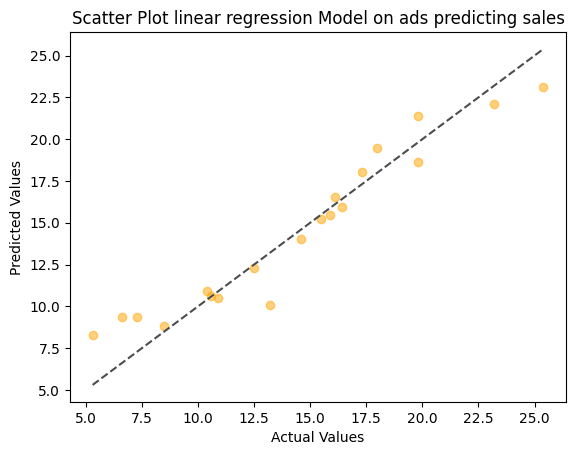

In [73]:
plt.scatter(y_test, y_pred_lin, alpha=0.5,color="orange")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot linear regression Model on ads predicting sales')
plt.show()

In [74]:
ridge_reg=Ridge(alpha=2.8)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=2.8)

In [75]:
y_pred_ridge=ridge_reg.predict(x_test)
mse_ridge=mean_squared_error(y_test,y_pred_ridge)
r2_ridge=r2_score(y_test,y_pred_ridge)

In [76]:
print("\nRidge Regression Results:")
print(f"Mean Squared Error: {mse_ridge:.4f}")
print(f"R^2 Score: {r2_ridge:.4f}")


Ridge Regression Results:
Mean Squared Error: 2.2361
R^2 Score: 0.9209


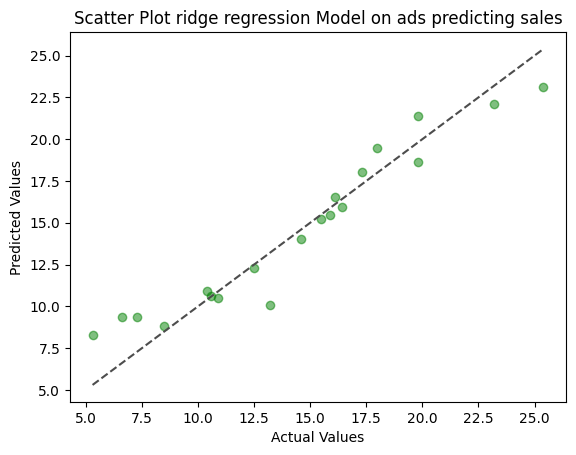

In [77]:
plt.scatter(y_test, y_pred_ridge, alpha=0.5,color="green")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot ridge regression Model on ads predicting sales')
plt.show()

In [78]:
lasso_reg = Lasso(alpha=.0001) 
lasso_reg .fit(x_train, y_train)


Lasso(alpha=0.0001)

In [79]:
y_pred_lasso = lasso_reg.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [80]:
print("\nLasso Regression Results:")
print(f"Mean Squared Error: {mse_lasso:.4f}")
print(f"R^2 Score: {r2_lasso:.4f}")


Lasso Regression Results:
Mean Squared Error: 2.2361
R^2 Score: 0.9209


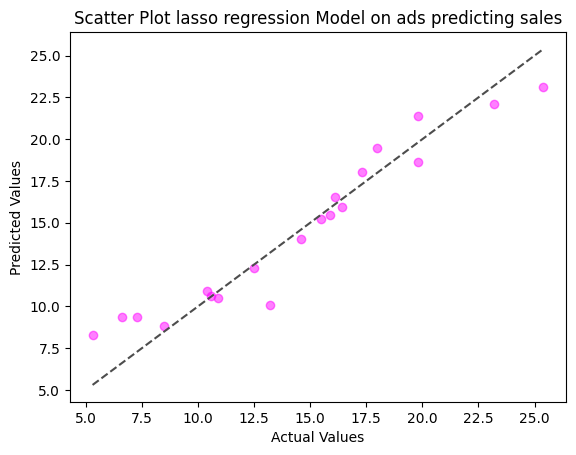

In [81]:
plt.scatter(y_test, y_pred_lasso, alpha=0.5,color="magenta")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot lasso regression Model on ads predicting sales')
plt.show()